In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset (update the file path if necessary)
data = pd.read_csv('C:/Users/akaks/OneDrive/Desktop/forest-fire-ai/forestfires.csv')


# Perform one-hot encoding on the 'month' and 'day' columns
data_encoded = pd.get_dummies(data, columns=['month', 'day'], drop_first=True)

# Split the data into features (X) and target (y)
X = data_encoded.drop(columns=['area'])  # All features except target
y = data_encoded['area']  # Target variable (area affected by fire)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42) 

# Train the model with the training data
model.fit(X_train, y_train)

# Predict the target values using the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 11955.85690856404


In [88]:
# Data exploration
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
data.info()

print("\nDataset Head:")
print(data.head())

print("\nDescriptive Statistics:")
print(data.describe()) 


Dataset Shape: (517, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB

Dataset Head:
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4  

In [89]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = data.drop(columns=['area'])  # All features except target
y = data['area']  # Target variable (area affected by fire)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
# Perform one-hot encoding on 'month' and 'day' columns
data_encoded = pd.get_dummies(data, columns=['month', 'day'], drop_first=True)

# Now, split the data into features (X) and target (y)
X = data_encoded.drop(columns=['area'])  # All features except target
y = data_encoded['area']  # Target variable (area affected by fire)

# Now, split the data into training and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with the training data
model.fit(X_train, y_train)

# Predict the target values using the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 11955.85690856404


In [91]:
# Perform one-hot encoding on 'month' and 'day' columns
data_encoded = pd.get_dummies(data, columns=['month', 'day'], drop_first=True)

# Now, split the data into features (X) and target (y)
X = data_encoded.drop(columns=['area'])  # All features except target
y = data_encoded['area']  # Target variable (area affected by fire)

# Now, split the data into training and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model with the training data
model.fit(X_train, y_train)

# Predict the target values using the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 11955.85690856404


In [92]:
def predict_fire_area(input_data, model):
    """
    Predicts fire-affected area based on sensor input.
    input_data: Dictionary with features like temp, RH, etc.
    """
    input_df = pd.DataFrame([input_data])
    
    # Apply one-hot encoding to month and day
    input_df_encoded = pd.get_dummies(input_df)
    
    # Align with training data columns
    missing_cols = set(X_train.columns) - set(input_df_encoded.columns)
    for col in missing_cols:
        input_df_encoded[col] = 0
    input_df_encoded = input_df_encoded[X_train.columns]

    prediction = model.predict(input_df_encoded)
    return prediction[0]


In [93]:
# Example sensor data (you can adjust based on real input)
new_sensor_data = {
    'X': 5,
    'Y': 4,
    'month': 'aug',
    'day': 'mon',
    'FFMC': 90.0,
    'DMC': 45.0,
    'DC': 600.0,
    'ISI': 8.0,
    'temp': 25.0,
    'RH': 30,
    'wind': 5.0,
    'rain': 0.0
}

# Predict
predicted_area = predict_fire_area(new_sensor_data, model)
print(f"🔥 Predicted Fire Area: {predicted_area:.2f} hactares")


🔥 Predicted Fire Area: 4.64 hactares


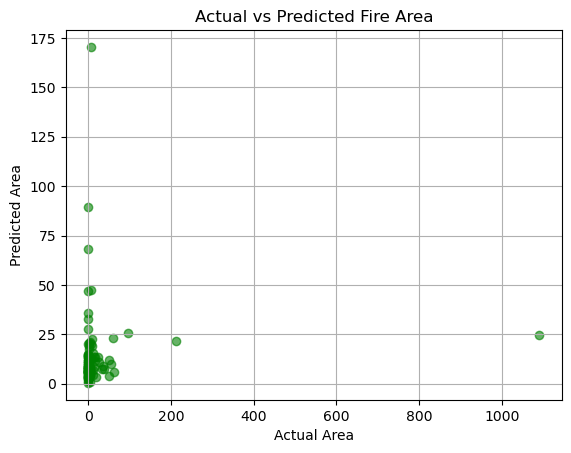

In [94]:
import matplotlib.pyplot as plt

# Compare actual vs predicted values visually
plt.scatter(y_test, y_pred, alpha=0.6, color='green')
plt.xlabel("Actual Area")
plt.ylabel("Predicted Area")
plt.title("Actual vs Predicted Fire Area")
plt.grid(True)
plt.show()


In [95]:
# Add a new column for fire risk level
def classify_risk(area):
    if area == 0:
        return 'Low'
    elif area <= 10:
        return 'Moderate'
    else:
        return 'High'

data['risk_level'] = data['area'].apply(classify_risk)


In [96]:
from sklearn.preprocessing import LabelEncoder

# Encode the risk_level column for classification
label_encoder = LabelEncoder()
data['risk_level_encoded'] = label_encoder.fit_transform(data['risk_level'])

# One-hot encode month and day (skip if you've done this already)
data_encoded = pd.get_dummies(data, columns=['month', 'day'], drop_first=True)


In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target
X = data_encoded.drop(columns=['area', 'risk_level', 'risk_level_encoded'])
y = data_encoded['risk_level_encoded']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

        High       0.57      0.19      0.29        21
         Low       0.56      0.71      0.63        51
    Moderate       0.45      0.47      0.46        32

    accuracy                           0.53       104
   macro avg       0.53      0.46      0.46       104
weighted avg       0.53      0.53      0.51       104

Confusion Matrix:
 [[ 4 12  5]
 [ 2 36 13]
 [ 1 16 15]]


In [98]:
# Ensure new_data matches training columns
missing_cols = set(X_train.columns) - set(new_data.columns)
for col in missing_cols:
    new_data[col] = 0

# Reorder columns to match
new_data = new_data[X_train.columns]
risk_pred_encoded = clf.predict(new_data)[0]
risk_pred_label = label_encoder.inverse_transform([risk_pred_encoded])[0]
print("Predicted Fire Risk Level:", risk_pred_label)




Predicted Fire Risk Level: Low


In [99]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}


In [100]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)

# GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [101]:
from sklearn.ensemble import RandomForestClassifier

# Re-initialize the model with the best parameters
best_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

# Fit the model with the training data
best_model.fit(X_train, y_train)

# Now, you can use this model to make predictions on the test set or new data
y_pred = best_model.predict(X_test)


In [102]:
from sklearn.metrics import accuracy_score

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.49038461538461536
